In [1]:
# Install required libraries
!pip install optree tensorflow keras scikit-learn matplotlib


In [2]:
# Import required libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

# Test if Keras works
print("All libraries imported successfully!")


2024-12-03 23:33:05.875946: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


All libraries imported successfully!


In [4]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Generate a synthetic dataset
X, y = make_classification(
    n_samples=1000,  # Number of samples
    n_features=20,   # Number of features
    n_informative=15, 
    n_redundant=5, 
    random_state=42
)

# Split into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)  # No stratify here

print("Dataset loaded and split successfully!")


Dataset loaded and split successfully!


In [5]:
# Define a simple neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=10,
    batch_size=32,
    verbose=1
)


/Users/mac/anaconda3/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.5555 - loss: 1.7683 - val_accuracy: 0.6600 - val_loss: 0.7008
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5399 - loss: 1.4036 - val_accuracy: 0.7467 - val_loss: 0.5799
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6072 - loss: 1.0545 - val_accuracy: 0.7800 - val_loss: 0.5223
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6017 - loss: 0.9258 - val_accuracy: 0.7600 - val_loss: 0.5065
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6318 - loss: 0.8350 - val_accuracy: 0.8000 - val_loss: 0.4916
Epoch 6/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6432 - loss: 0.7711 - val_accuracy: 0.8333 - val_loss: 0.4785
Epoch 7/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7156 - loss: 0.6297 - val_accuracy: 0.8467 - val_loss: 0.4667
Epoch 8/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6892 - loss: 0.6448 - val_accuracy: 0.8800 - val_loss

In [6]:
# Evaluate on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Generate predictions
y_pred = (model.predict(X_test) > 0.5).astype(int)

# Display confusion matrix and classification report
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Test Loss: 0.4562
Test Accuracy: 0.8267
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step

Confusion Matrix:
[[59 18]
 [ 8 65]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.77      0.82        77
           1       0.78      0.89      0.83        73

    accuracy                           0.83       150
   macro avg       0.83      0.83      0.83       150
weighted avg       0.83      0.83      0.83       150



In [7]:
# Define a simple neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=10,
    batch_size=32,
    verbose=1
)


Epoch 1/10


/Users/mac/anaconda3/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.4855 - loss: 1.5949 - val_accuracy: 0.6733 - val_loss: 0.7024
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6032 - loss: 0.9304 - val_accuracy: 0.7200 - val_loss: 0.6050
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6032 - loss: 0.8711 - val_accuracy: 0.7533 - val_loss: 0.5459
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6072 - loss: 0.7873 - val_accuracy: 0.7867 - val_loss: 0.5103
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6374 - loss: 0.7110 - val_accuracy: 0.8067 - val_loss: 0.4758
Epoch 6/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7278 - loss: 0.6211 - val_accuracy: 0.8400 - val_loss: 0.4483
Epoch 7/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7124 - loss: 0.5365 - val_accuracy: 0.8267 - val_loss: 0.4381
Epoch 8/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6901 - loss: 0.5853 - val_accuracy: 0.8733 - val_loss: 0.4165
Ep

In [8]:
# Evaluate on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Generate predictions
y_pred = (model.predict(X_test) > 0.5).astype(int)

# Display confusion matrix and classification report
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Test Loss: 0.3985
Test Accuracy: 0.8200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step

Confusion Matrix:
[[56 21]
 [ 6 67]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.73      0.81        77
           1       0.76      0.92      0.83        73

    accuracy                           0.82       150
   macro avg       0.83      0.82      0.82       150
weighted avg       0.83      0.82      0.82       150



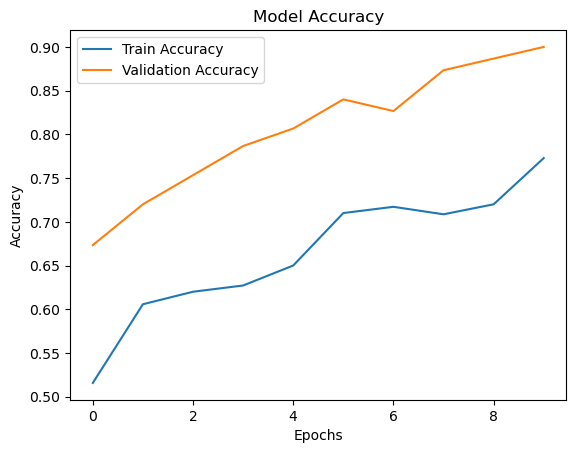

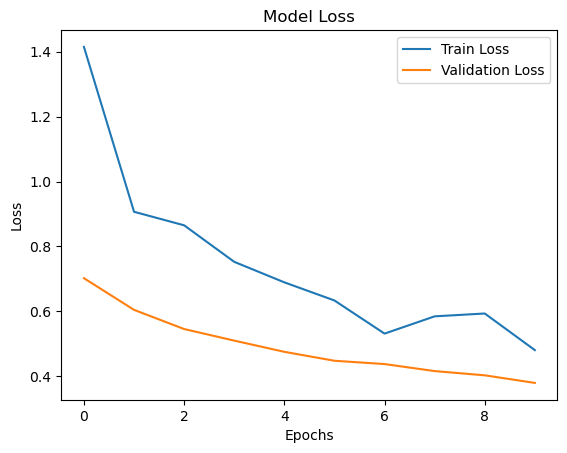

In [9]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
